<a href="https://www.kaggle.com/code/fabinahian/fashion-mnist-using-cnn?scriptVersionId=148884413" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ⚡️ OBJECTIVES 

- EDA of Fashion MNIST
- Identification & Classification of Sustainable Apparel Products

# ⚡️ DATASET: [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist/data) (👕👖🧥👗🥼👡👔👟👜👢) 

**Content**

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

- Each row is a separate image
- Column 1 is the class label.
- Remaining columns are pixel numbers (784 total).
- Each value is the darkness of the pixel (1 to 255)

**Data Dictionary**

Each training and test example is assigned to one of the following labels:

- 0 : T-shirt/top
- 1 : Trouser
- 2 : Pullover
- 3 : Dress
- 4 : Coat
- 5 : Sandal
- 6 : Shirt
- 7 : Sneaker
- 8 : Bag
- 9 : Ankle boot


# ⚡️ IMPORTS

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ⚡️ DATA ANALYSIS

**Reading the Data**

In [16]:
#dataframe for the train dataset
df_train = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')

#dataframe for the test dataset
df_test  = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

**Sneak Peek of the Data**

In [17]:
# Observing the data head of the train data

df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Observing the data head of the test data

df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Observation**: In both train data & test data, there are 785 columns, out of which, the 1st column is the label & the rest are the input features.

**Shape of the Data**

In [13]:
print("Train Data\n")
print("Rows: ", df_train.shape[0])
print("Columns: ", df_train.shape[1])
print("\n")

print("Test Data\n")
print("Rows: ", df_test.shape[0])
print("Columns: ", df_test.shape[1])

Train Data

Rows:  60000
Columns:  785


Test Data

Rows:  10000
Columns:  785


**Observation**: The number of columns is the same for both train data & test data; however, the number of rows differs. For train data, there are 60000 rows & test data has 10000 rows.

So, there are 60000 training data & 10000 testing data.

**Data Info**

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


**Observation**: Both training samples & testing samples consist of integer values. So, the labels are also numerical values.

**Finding Unique Labels**

In [23]:
#the unique labels that exist in all 60000 training samples

unique_labels_train = df_train.label.unique()
unique_labels_train.sort() #we can sort this because according to data info, the labels are integer values.
print(unique_labels_train)

[0 1 2 3 4 5 6 7 8 9]


**Observation**: There is no case of labelling outside of range within the training data. That's a good thing! ✅

In [24]:
#the unique labels that exist in all 10000 testing samples

unique_labels_test = df_test.label.unique()
unique_labels_test.sort() #we can sort this because according to data info, the labels are integer values.
print(unique_labels_test)

[0 1 2 3 4 5 6 7 8 9]


**Observation**: There is no case of labelling outside of range within the testing data. That's a good thing! ✅

**NaN Values**

In [29]:
#checking for missing values
df_train.isnull().any().sum()

0

In [30]:
#checking for missing values
df_test.isnull().any().sum()

0

**Observation**: There is no missing value or null value in the training samples or the testing samples. That's a good thing! ✅

**Data Count per Label/Category**

In [36]:
#checking how many data we have for each category
df_train['label'].value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

<Axes: xlabel='label'>

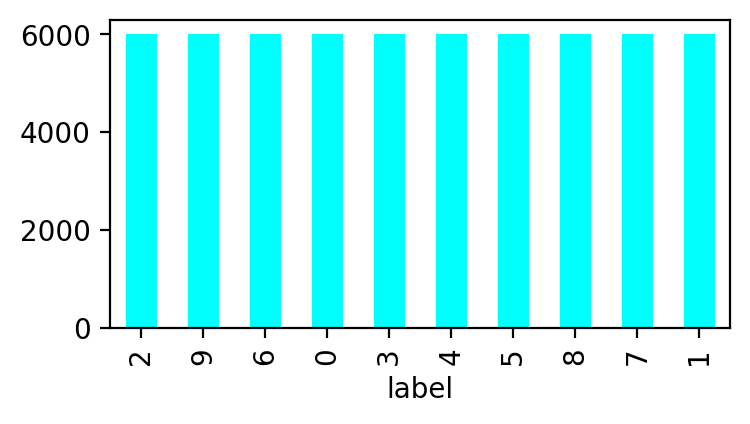

In [96]:
df_train['label'].value_counts().plot(kind = 'bar', figsize = (4,2), color = 'cyan')

**Observation**: Each label has 6000 training data. So, there's no imbalance in the training data. That's a good thing! ✅

In [37]:
#checking how many data we have for each category
df_test['label'].value_counts()

label
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: count, dtype: int64

<Axes: xlabel='label'>

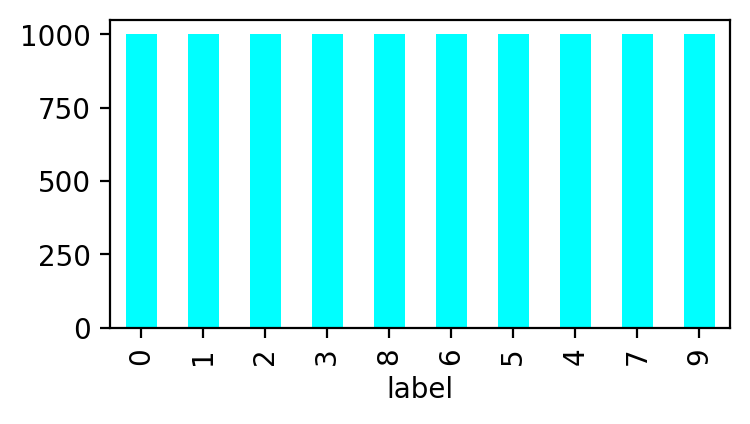

In [97]:
df_test['label'].value_counts().plot(kind = 'bar', figsize = (4,2), color = 'cyan')

**Observation**: Each label has 1000 testing data. So, there's no imbalance in the testing data. That's a good thing! ✅

# ⚡️ DATA VISUALIZATION

In [73]:
# Mapping classes to their respective labels

apparel_items = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

**Visualizing Training Data**

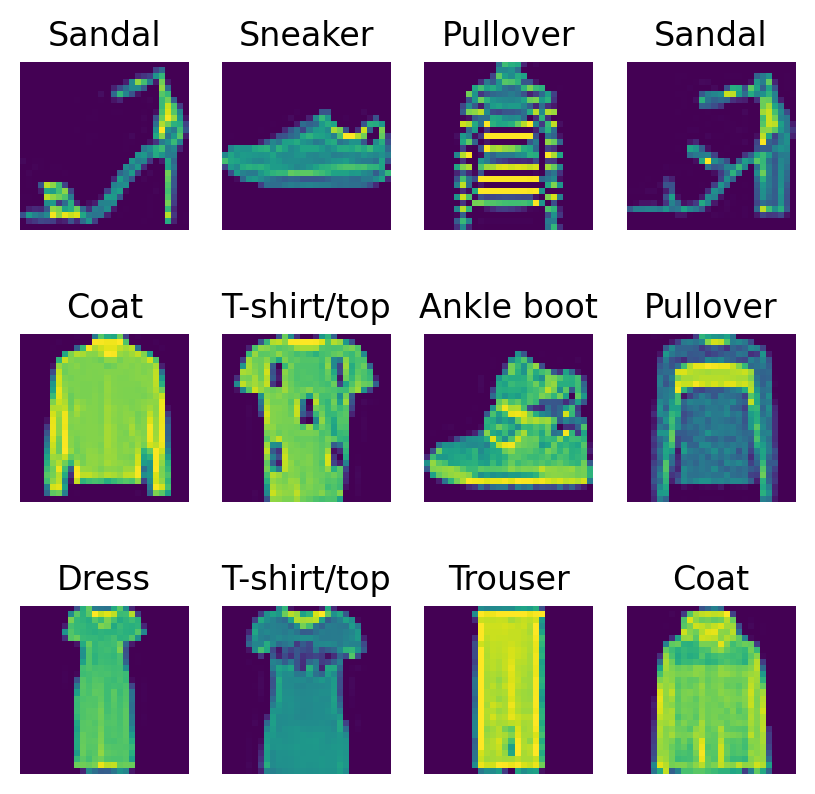

In [89]:
fig, axes = plt.subplots(3, 4, figsize = (5,5))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = df_train.drop('label', axis=1).values[index].reshape(28,28)
        train_item = df_train['label'][index]
        axe.imshow(img)
        axe.set_title(apparel_items[train_item])
        axe.set_axis_off()

In [7]:
#Separating features and target labels

X_train = df_train.drop('label', axis=1) # features
y_train = df_train['label'] # target labels

In [10]:
X_test = df_test.drop('label', axis=1) # features
y_test = df_test['label'] # target labels